# Applying GBDT and Random forest algorithms on amazon fine food Reviews dataset

## GBDT and Random forest

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.

Number of reviews: 568,454
Number of users: 256,059
Number of products: 74,258
Timespan: Oct 1999 - Oct 2012
Number of Attributes/Columns in data: 10

Attribute Information:

Id
* ProductId - unique identifier for the product
* UserId - unqiue identifier for the user
* ProfileName
* HelpfulnessNumerator - number of users who found the review helpful
* HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
* Score - rating between 1 and 5
* Time - timestamp for the review
* Summary - brief summary of the review
* Text - text of the review

<b>Disclaimer :</b>
* I have trained all the brute force models with 40K Data points, But since I have only 4GB RAM I have trained kd_tree models with 3K points and tfidf W2V model with 10K points

# Data Preprocessing

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn import cross_validation
from sklearn.preprocessing import Imputer
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from mpl_toolkits import mplot3d
import warnings
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.svm import SVC
from tqdm import tqdm

con = sqlite3.connect('./amazon-fine-food-reviews/database.sqlite') 
warnings.filterwarnings("ignore", category=DeprecationWarning)
filtered_data = pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE Score != 3
""", con) 


def partition(x):
    if x < 3:
        return 0
    return 1

actualScore = filtered_data['Score']
positiveNegative = actualScore.map(partition) 
filtered_data['Score'] = positiveNegative

/home/gateway/home/gateway/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
filtered_data.shape
filtered_data.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,1,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,1,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,1,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,1,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,1,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [3]:
display= pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE Score != 3 AND UserId="AR5J8UI46CURR"
ORDER BY ProductID
""", con)
display

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,78445,B000HDL1RQ,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
1,138317,B000HDOPYC,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
2,138277,B000HDOPYM,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
3,73791,B000HDOPZG,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
4,155049,B000PAQ75C,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...


In [4]:
sorted_data=filtered_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [5]:
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(364173, 10)

In [6]:
(final['Id'].size*1.0)/(filtered_data['Id'].size*1.0)*100

69.25890143662969

In [7]:
display= pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE Score != 3 AND Id=44737 OR Id=64422
ORDER BY ProductID
""", con)
display


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...
1,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...


In [8]:
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]


In [9]:
print(final.shape)
final['Score'].value_counts()

(364171, 10)


1    307061
0     57110
Name: Score, dtype: int64

In [10]:
from sklearn.utils import resample
neg=final[final.Score==0]
pos=final[final.Score==1]
neg_samp = resample(nrg,replace=True,n_samples=major.shape[0])
final = pd.concat([pos,neg_samp])

In [11]:
final['Score'].value_counts()

1    307061
0    307061
Name: Score, dtype: int64

In [12]:
final=final.sort_values(by='Time')

In [13]:
labels=final["Score"]
final=final.drop("Score",axis=1)
final.head(4)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,939340800,EVERY book is educational,this witty little book makes my son laugh at l...
138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...
417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...
346055,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta..."


In [14]:
#final=final[0:5000]
#labels=labels[0:5000]

In [15]:
#for i in range(0,labels.size):
#    if labels.iloc[i]=='positive':
#        labels.iloc[i]=1
#    else:
#        labels.iloc[i]=0

In [16]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = set(stopwords.words('english'))
sno = nltk.stem.SnowballStemmer('english') 
def cleanhtml(sentence): 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [17]:
i=0
str1=' '
final_string=[]
s=''
for sent in tqdm(final['Text'].values):
    filtered_sentence=[]
    sent=cleanhtml(sent) 
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                else:
                    continue
            else:
                continue 
    str1 = b" ".join(filtered_sentence) 
    
    final_string.append(str1)
    i+=1

100%|██████████| 614122/614122 [15:07<00:00, 676.92it/s]


In [18]:
final['CleanedText']=final_string 
final['CleanedText']=final['CleanedText'].str.decode("utf-8")

In [19]:
final.loc[138706]['Text']

"this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college"

In [20]:
final.loc[138706]['CleanedText']

'witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg'

In [21]:
final.head(4)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,CleanedText
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,rememb see show air televis year ago child sis...
417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...
346055,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",twist rumplestiskin captur film star michael k...


In [22]:
final.index=np.arange(len(final))
labels.index=np.arange(len(labels))

from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(final['CleanedText']):
    X_tr, X_test = final.loc[train_index,'CleanedText'], final.loc[test_index,'CleanedText']
    y_tr, y_test = labels[train_index], labels[test_index]

In [23]:
print(X_tr.shape)
print(X_test.shape)

(511769,)
(102353,)


# Bag of words

In [24]:
count_vect = CountVectorizer()
final_counts = count_vect.fit_transform(X_tr)
final_test = count_vect.transform(X_test)


The optimal values of depth and ensembles are 25 and 30.000000.


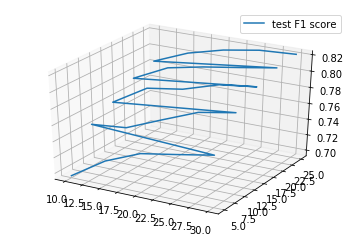

In [25]:
from mpl_toolkits import mplot3d
ensembles = [10,15,20,25,30]
depths=[5,10,15,20,25]
tuned_parameters=[{'n_estimators': ensembles,'max_depth':depths}]
rf = RandomForestClassifier()
model = GridSearchCV(rf, tuned_parameters, scoring = 'f1',n_jobs=-1, cv=5,return_train_score=True)
model.fit(final_counts, y_tr)
result=pd.DataFrame(model.cv_results_)
MSE = [i for i in result['mean_test_score']]
optimal_ensembles = model.best_params_['n_estimators']
optimal_depth=model.best_params_['max_depth']
print('\nThe optimal values of depth and ensembles are %d and %f.'  %(optimal_depth,optimal_ensembles))
fig = plt.figure()
ax = fig.gca(projection='3d')
zs=np.array(MSE)
x = ensembles
y = depths
X, Y = np.meshgrid(x, y)
Z = zs.reshape(X.shape)
X=X.ravel()
Y=Y.ravel()
Z=Z.ravel()
ax.plot(X, Y, Z, label='test F1 score')
ax.legend()
plt.show()

In [26]:
rf_optimal = RandomForestClassifier(n_estimators = optimal_ensembles,max_depth = optimal_depth)
rf_optimal.fit(final_counts, y_tr)
pred = rf_optimal.predict(final_test)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of optimal Random forest classifier is %f%%' %  acc)


The accuracy of optimal Random forest classifier is 80.347425%


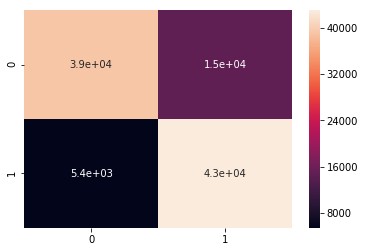

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

In [28]:
from sklearn.metrics import precision_recall_fscore_support
scr=precision_recall_fscore_support(y_test, pred, average='weighted')
print("precision of the Logistic Regression for bag of words is",scr[0])
print("recall of the Logistic Regression for bag of words is",scr[1])
print("fscore of the Logistic Regression for bag of words is",scr[2])

precision of the Logistic Regression for bag of words is 0.8156035815837351
recall of the Logistic Regression for bag of words is 0.8034742508768673
fscore of the Logistic Regression for bag of words is 0.802815780625407


# Important features

In [29]:
print("Top features to classify class labels are:\n")
imp_fea = rf_optimal.feature_importances_.argsort()[::-1]
print(np.take(count_vect.get_feature_names(), imp_fea[:21]),"\n")

Top features to classify class labels are:

['disappoint' 'great' 'love' 'best' 'delici' 'terribl' 'threw' 'easi'
 'tast' 'review' 'wast' 'thought' 'product' 'money' 'stale' 'label'
 'didnt' 'away' 'horribl' 'find' 'disgust'] 



 * ## RandomForest using Randomsearchcv

In [30]:
from sklearn.model_selection import RandomizedSearchCV
ensembles=[10,15,20,25,30]
depths=[5,10,15,20,25]
tuned_parameters={'n_estimators': ensembles,'max_depth':depths}
rf = RandomForestClassifier()
model = RandomizedSearchCV(rf, tuned_parameters, scoring = 'f1',n_iter=5, cv=5,return_train_score=True)
model.fit(final_counts, y_tr)
print(model.best_estimator_)
pred = model.best_estimator_.predict(final_test)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of optimal SVC classifier for optimal model is %f' % (acc))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

The accuracy of optimal SVC classifier for optimal model is 87.500000


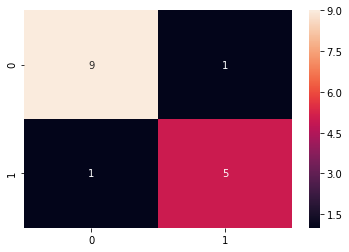

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

In [32]:
from sklearn.metrics import precision_recall_fscore_support
scr=precision_recall_fscore_support(y_test, pred, average='weighted')
print("precision of the Logistic Regression for bag of words is",scr[0])
print("recall of the Logistic Regression for bag of words is",scr[1])
print("fscore of the Logistic Regression for bag of words is",scr[2])

precision of the Logistic Regression for bag of words is 0.875
recall of the Logistic Regression for bag of words is 0.875
fscore of the Logistic Regression for bag of words is 0.875


# Tfidf

In [33]:
tf_idf_vect = TfidfVectorizer()
final_tf_idf = tf_idf_vect.fit_transform(X_tr)
final_test = tf_idf_vect.transform(X_test)

In [34]:
print(final_test.get_shape())
print(type(final_test))

(16, 1160)
<class 'scipy.sparse.csr.csr_matrix'>


In [35]:
features = tf_idf_vect.get_feature_names()
len(features)

1160

In [36]:
features[3000:3010]

[]

In [37]:
print(final_tf_idf[3,:].toarray()[0])

[0. 0. 0. ... 0. 0. 0.]


In [38]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''

    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

top_tfidf = top_tfidf_feats(final_tf_idf[3,:].toarray()[0],features)
print(np.argsort(final_tf_idf[3,:].toarray()[0])[::-1][:25])

final_tf_idf[3,:].get_shape()

[ 89 419 626 180 864 745 681 552 630 286 167 106 389 919 973 127   8 198
 371 584 651 684 386 388 390]


(1, 1160)

In [39]:
type(top_tfidf)

pandas.core.frame.DataFrame

In [40]:
top_tfidf

,feature,tfidf
0,beetlejuic,0.361451
1,ghoul,0.223926
2,mere,0.223926
3,cinematographi,0.223926
4,script,0.223926
5,popcorn,0.223926
6,often,0.223926
7,keaton,0.223926
8,michael,0.223926
9,distinguish,0.223926



The optimal values of depth and ensembles are 20 and 25.000000.


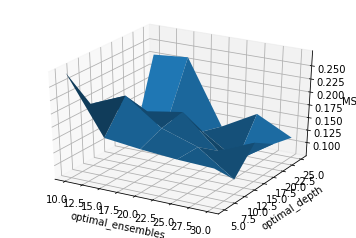

In [41]:
ensembles=[10,15,20,25,30]
depths=[5,10,15,20,25]
tuned_parameters=[{'n_estimators': ensembles,'max_depth':depths}]
rf = RandomForestClassifier()
model = GridSearchCV(rf, tuned_parameters, scoring = 'f1', cv=5,return_train_score=True)
model.fit(final_tf_idf, y_tr)
MSE = [1-i[1] for i in model.grid_scores_]
optimal_ensembles = model.best_params_['n_estimators']
optimal_depth=model.best_params_['max_depth']
print('\nThe optimal values of depth and ensembles are %d and %f.'  %(optimal_depth,optimal_ensembles))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = ensembles
y = depths
X, Y = np.meshgrid(x, y)
zs = np.array(MSE)
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z)
ax.set_xlabel('optimal_ensembles')
ax.set_ylabel('optimal_depth')
ax.set_zlabel('MSE')
plt.show()

In [42]:
rf_optimal = RandomForestClassifier(n_estimators=optimal_ensembles,max_depth = optimal_depth)
rf_optimal.fit(final_tf_idf, y_tr)
pred = rf_optimal.predict(final_test)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of optimal Random forest classifier is %f%%' %  acc)


The accuracy of optimal Random forest classifier is 87.500000%


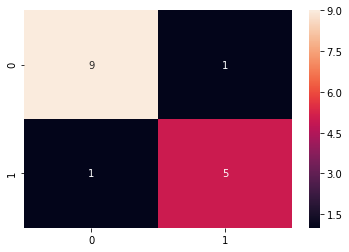

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

In [44]:
from sklearn.metrics import precision_recall_fscore_support
scr=precision_recall_fscore_support(y_test, pred, average='weighted')
print("precision of the Logistic Regression for bag of words is",scr[0])
print("recall of the Logistic Regression for bag of words is",scr[1])
print("fscore of the Logistic Regression for bag of words is",scr[2])

precision of the Logistic Regression for bag of words is 0.875
recall of the Logistic Regression for bag of words is 0.875
fscore of the Logistic Regression for bag of words is 0.875


# Important features

In [45]:
print("Top features to classify class labels are:\n")
imp_fea = np.absolute(rf_optimal.feature_importances_).argsort()[::-1]
print(np.take(tf_idf_vect.get_feature_names(), imp_fea[:11]),"\n")

Top features to classify class labels are:

['fli' 'book' 'love' 'read' 'treat' 'caught' 'fruit' 'dog' 'great' 'month'
 'chicken'] 



# RandonSearchCV

In [46]:
from sklearn.model_selection import RandomizedSearchCV
ensembles=[10,15,20,25,30]
depths=[5,10,15,20,25]
tuned_parameters={'n_estimators': ensembles,'max_depth':depths}
rf = RandomForestClassifier()
model = RandomizedSearchCV(rf, tuned_parameters, scoring = 'f1',n_iter=5, cv=5,return_train_score=True)
model.fit(final_tf_idf, y_tr)
print(model.best_estimator_)
pred = model.best_estimator_.predict(final_test)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of optimal SVC classifier for optimal model is %f' % (acc))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

The accuracy of optimal SVC classifier for optimal model is 87.500000


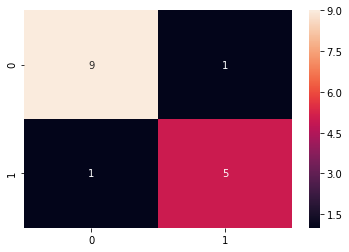

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

In [48]:
from sklearn.metrics import precision_recall_fscore_support
scr=precision_recall_fscore_support(y_test, pred, average='weighted')
print("precision of the Logistic Regression for bag of words is",scr[0])
print("recall of the Logistic Regression for bag of words is",scr[1])
print("fscore of the Logistic Regression for bag of words is",scr[2])

precision of the Logistic Regression for bag of words is 0.875
recall of the Logistic Regression for bag of words is 0.875
fscore of the Logistic Regression for bag of words is 0.875


# Word to Vec

In [49]:
list_of_sent=[]
for sent in X_tr:
    list_of_sent.append(sent.split())

In [50]:
# Train your own Word2Vec model using your own text corpus
list_of_test=[]
for sent in X_test:
    list_of_test.append(sent.split())

In [51]:
print(X_tr[0])
print("*****************************************************************")
print(list_of_sent[0])

witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg
*****************************************************************
['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'book', 'introduc', 'silli', 'classic', 'book', 'will', 'bet', 'son', 'still', 'abl', 'recit', 'memori', 'colleg']


In [52]:
print(X_test[len(X_tr)])
print("*****************************************************************")
print(list_of_test[0])

rememb book childhood got kid good rememb kid love older daughter read sister good rhyme nice pictur
*****************************************************************
['rememb', 'book', 'childhood', 'got', 'kid', 'good', 'rememb', 'kid', 'love', 'older', 'daughter', 'read', 'sister', 'good', 'rhyme', 'nice', 'pictur']


In [53]:
import gensim

# min_count = 5 considers only words that occured atleast 5 times
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)

In [54]:
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  147
sample words  ['littl', 'book', 'make', 'alway', 'sing', 'learn', 'love', 'new', 'word', 'classic', 'still', 'rememb', 'see', 'year', 'child', 'bought', 'day', 'someth', 'use', 'song', 'teach', 'school', 'purchas', 'children', 'enjoy', 'movi', 'didnt', 'pick', 'edit', 'famili', 'version', 'want', 'beetlejuic', 'come', 'like', 'find', 'one', 'get', 'dvd', 'releas', 'great', 'give', 'wonder', 'extra', 'even', 'film', 'never', 'less', 'origin', 'money']


In [55]:
w2v_model.wv.most_similar('book')

/home/gateway/home/gateway/anaconda/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('still', 0.3952651619911194),
 ('realli', 0.3897516429424286),
 ('origin', 0.38781052827835083),
 ('see', 0.3844839930534363),
 ('liver', 0.3717564344406128),
 ('sure', 0.3683568835258484),
 ('fli', 0.36279988288879395),
 ('fruit', 0.35752707719802856),
 ('amazon', 0.3564814329147339),
 ('purpos', 0.352981299161911)]

In [56]:
w2v_model.wv.most_similar('laugh')

KeyError: "word 'laugh' not in vocabulary"

# Avg word2Vec

In [57]:
sent_vectors = [];
for sent in list_of_sent: 
    sent_vec = np.zeros(50) 
    cnt_words =0;
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)

In [58]:
len(list_of_test)

16

In [59]:
test_vectors = [];
for sent in list_of_test:
    sent_vec = np.zeros(50)
    cnt_words =0;
    for word in sent:
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    test_vectors.append(sent_vec)

In [60]:
mean_impute = Imputer(missing_values='NaN', strategy='mean', axis=0)
sent_vectors = mean_impute.fit_transform(sent_vectors)


The optimal values of depth and ensembles are 5 and 20.000000.


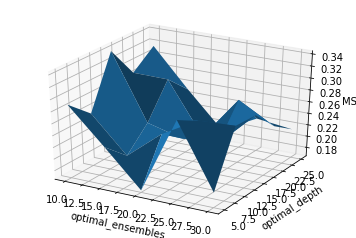

In [61]:
ensembles=[10,15,20,25,30]
depths=[5,10,15,20,25]
tuned_parameters=[{'n_estimators': ensembles,'max_depth':depths}]
rf = RandomForestClassifier()
model = GridSearchCV(rf, tuned_parameters, scoring = 'f1', cv=5,return_train_score=True)
model.fit(sent_vectors, y_tr)
MSE = [1-i[1] for i in model.grid_scores_]
optimal_ensembles = model.best_params_['n_estimators']
optimal_depth=model.best_params_['max_depth']
print('\nThe optimal values of depth and ensembles are %d and %f.'  %(optimal_depth,optimal_ensembles))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = ensembles
y = depths
X, Y = np.meshgrid(x, y)
zs = np.array(MSE)
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z)
ax.set_xlabel('optimal_ensembles')
ax.set_ylabel('optimal_depth')
ax.set_zlabel('MSE')
plt.show()

In [64]:
rf_optimal = RandomForestClassifier(n_estimators=optimal_ensembles,max_depth = optimal_depth)
rf_optimal.fit(sent_vectors, y_tr)
pred = rf_optimal.predict(test_vectors)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of optimal Random forest classifier is %f%%' %  acc)


The accuracy of optimal Random forest classifier is 87.500000%


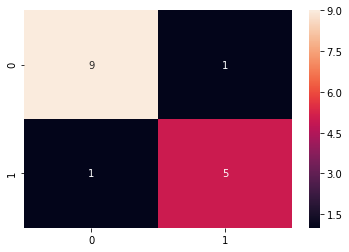

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

In [66]:
from sklearn.metrics import precision_recall_fscore_support
scr=precision_recall_fscore_support(y_test, pred, average='weighted')
print("precision of the Logistic Regression for bag of words is",scr[0])
print("recall of the Logistic Regression for bag of words is",scr[1])
print("fscore of the Logistic Regression for bag of words is",scr[2])

precision of the Logistic Regression for bag of words is 0.875
recall of the Logistic Regression for bag of words is 0.875
fscore of the Logistic Regression for bag of words is 0.875


# Important features

In [67]:
print("Top features to classify class labels are:\n")
imp_fea = np.absolute(rf_optimal.feature_importances_).argsort()[::-1]
print(np.take(tf_idf_vect.get_feature_names(), imp_fea[:11]),"\n")

Top features to classify class labels are:

['along' 'accompani' 'anoth' 'act' 'afternoon' 'almost' 'abl' 'apart'
 'amazon' 'afterlif' 'alergi'] 



# RandonSearchCV

In [68]:
from sklearn.model_selection import RandomizedSearchCV
ensembles=[10,15,20,25,30]
depths=[5,10,15,20,25]
tuned_parameters={'n_estimators': ensembles,'max_depth':depths}
rf = RandomForestClassifier()
model = RandomizedSearchCV(rf, tuned_parameters, scoring = 'f1',n_iter=5, cv=5,return_train_score=True)
model.fit(sent_vectors, y_tr)
print(model.best_estimator_)
pred = model.best_estimator_.predict(test_vectors)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of optimal SVC classifier for optimal model is %f' % (acc))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

The accuracy of optimal SVC classifier for optimal model is 87.500000


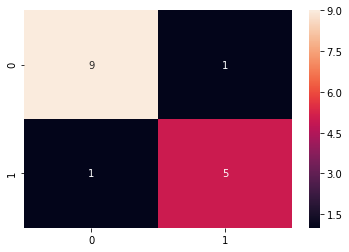

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

In [70]:
from sklearn.metrics import precision_recall_fscore_support
scr=precision_recall_fscore_support(y_test, pred, average='weighted')
print("precision of the Logistic Regression for bag of words is",scr[0])
print("recall of the Logistic Regression for bag of words is",scr[1])
print("fscore of the Logistic Regression for bag of words is",scr[2])

precision of the Logistic Regression for bag of words is 0.875
recall of the Logistic Regression for bag of words is 0.875
fscore of the Logistic Regression for bag of words is 0.875


# GBDT


The optimal values of depth and ensembles are 2 and 100.000000.


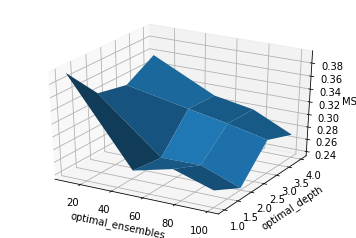

In [71]:
import xgboost as xgb
ensembles=[10,50,75,100]
depths=[1,2,3,4]
tuned_parameters=[{'n_estimators': ensembles,'max_depth':depths}]
gb_clf = xgb.XGBClassifier()
model = GridSearchCV(gb_clf, tuned_parameters, scoring = 'f1', cv=5,return_train_score=True)
model.fit(sent_vectors, y_tr)
MSE = [1-i[1] for i in model.grid_scores_]
optimal_ensembles = model.best_params_['n_estimators']
optimal_depth=model.best_params_['max_depth']
print('\nThe optimal values of depth and ensembles are %d and %f.'  %(optimal_depth,optimal_ensembles))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = ensembles
y = depths
X, Y = np.meshgrid(x, y)
zs = np.array(MSE)
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z)
ax.set_xlabel('optimal_ensembles')
ax.set_ylabel('optimal_depth')
ax.set_zlabel('MSE')
plt.show()

In [72]:
gbdt_optimal = xgb.XGBClassifier(n_estimators=optimal_ensembles,max_depth = optimal_depth)
gbdt_optimal.fit(sent_vectors, y_tr)
pred = gbdt_optimal.predict(test_vectors)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of optimal Random forest classifier is %f%%' %  acc)


The accuracy of optimal Random forest classifier is 93.750000%


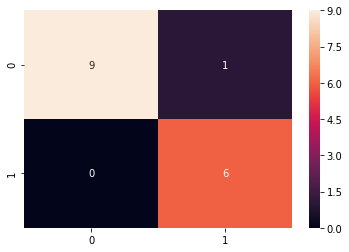

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

In [74]:
from sklearn.metrics import precision_recall_fscore_support
scr=precision_recall_fscore_support(y_test, pred, average='weighted')
print("precision of the Logistic Regression for bag of words is",scr[0])
print("recall of the Logistic Regression for bag of words is",scr[1])
print("fscore of the Logistic Regression for bag of words is",scr[2])

precision of the Logistic Regression for bag of words is 0.9464285714285714
recall of the Logistic Regression for bag of words is 0.9375
fscore of the Logistic Regression for bag of words is 0.938259109311741


# RandonSearchCV

In [80]:
from sklearn.model_selection import RandomizedSearchCV
ensembles=[10,50,75,100]
depths=[1,2,3,4]
tuned_parameters={'n_estimators': ensembles,'max_depth':depths}
random_gbdt = xgb.XGBClassifier()
model = RandomizedSearchCV(random_gbdt, tuned_parameters, scoring = 'f1',n_iter=4, cv=5,return_train_score=True)
model.fit(sent_vectors, y_tr)
print(model.best_estimator_)
pred = model.best_estimator_.predict(test_vectors)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of optimal SVC classifier for optimal model is %f' % (acc))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

The accuracy of optimal SVC classifier for optimal model is 93.750000


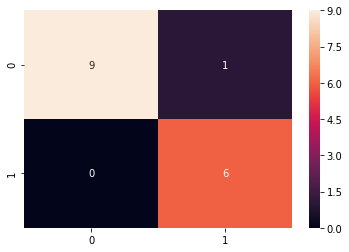

In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

In [82]:
from sklearn.metrics import precision_recall_fscore_support
scr=precision_recall_fscore_support(y_test, pred, average='weighted')
print("precision of the Logistic Regression for bag of words is",scr[0])
print("recall of the Logistic Regression for bag of words is",scr[1])
print("fscore of the Logistic Regression for bag of words is",scr[2])

precision of the Logistic Regression for bag of words is 0.9464285714285714
recall of the Logistic Regression for bag of words is 0.9375
fscore of the Logistic Regression for bag of words is 0.938259109311741


# Tfidf W2V

In [83]:
tfidf_feat = tf_idf_vect.get_feature_names() 
tfidf_sent_vectors = [];
row=0;
i=1
for sent in list_of_sent:
    sent_vec = np.zeros(50) 
    weight_sum =0; 
    for word in sent:
        try:
            vec = w2v_model.wv[word]
            tf_idf = final_tf_idf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

In [84]:
tfidf_feat = tf_idf_vect.get_feature_names()
tfidf_test_vectors = []; 
row=0;
for sent in list_of_test:
    sent_vec = np.zeros(50)
    weight_sum =0; 
    for word in sent: 
        try:
            vec = w2v_model.wv[word]
            tf_idf = final_test[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_test_vectors.append(sent_vec)
    row += 1

In [85]:
mean_impute = Imputer(missing_values='NaN', strategy='mean', axis=0)
tfidf_sent_vectors = mean_impute.fit_transform(tfidf_sent_vectors)
mean_impute = Imputer(missing_values='NaN', strategy='mean', axis=0)
tfidf_test_vectors = mean_impute.fit_transform(tfidf_test_vectors)
type(tfidf_sent_vectors)

numpy.ndarray


The optimal values of depth and ensembles are 10 and 25.000000.


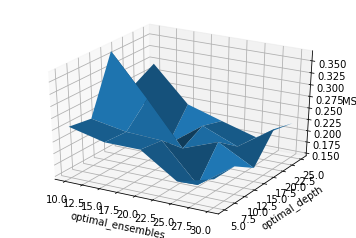

In [86]:
ensembles=[10,15,20,25,30]
depths=[5,10,15,20,25]
tuned_parameters=[{'n_estimators': ensembles,'max_depth':depths}]
rf = RandomForestClassifier()
model = GridSearchCV(rf, tuned_parameters, scoring = 'f1', cv=5,return_train_score=True)
model.fit(tfidf_sent_vectors, y_tr)
MSE = [1-i[1] for i in model.grid_scores_]
optimal_ensembles = model.best_params_['n_estimators']
optimal_depth=model.best_params_['max_depth']
print('\nThe optimal values of depth and ensembles are %d and %f.'  %(optimal_depth,optimal_ensembles))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = ensembles
y = depths
X, Y = np.meshgrid(x, y)
zs = np.array(MSE)
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z)
ax.set_xlabel('optimal_ensembles')
ax.set_ylabel('optimal_depth')
ax.set_zlabel('MSE')
plt.show()

In [87]:
rf_optimal = RandomForestClassifier(n_estimators=optimal_ensembles,max_depth = optimal_depth)
rf_optimal.fit(tfidf_sent_vectors, y_tr)
pred = rf_optimal.predict(tfidf_test_vectors)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of optimal Random forest classifier is %f%%' %  acc)


The accuracy of optimal Random forest classifier is 93.750000%


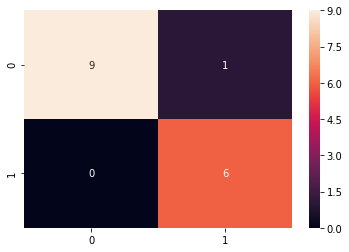

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

In [89]:
from sklearn.metrics import precision_recall_fscore_support
scr=precision_recall_fscore_support(y_test, pred, average='weighted')
print("precision of the Logistic Regression for bag of words is",scr[0])
print("recall of the Logistic Regression for bag of words is",scr[1])
print("fscore of the Logistic Regression for bag of words is",scr[2])

precision of the Logistic Regression for bag of words is 0.9464285714285714
recall of the Logistic Regression for bag of words is 0.9375
fscore of the Logistic Regression for bag of words is 0.938259109311741


## Important features

In [90]:
print("Top features to classify class labels are:\n")
imp_fea = np.absolute(rf_optimal.feature_importances_).argsort()[::-1]
print(np.take(tf_idf_vect.get_feature_names(), imp_fea[:11]),"\n")

Top features to classify class labels are:

['apart' 'along' 'abl' 'amazon' 'afterlif' 'amaz' 'accompani' 'alway'
 'anoth' 'among' 'advic'] 



## RandonSearchCV

In [91]:
from sklearn.model_selection import RandomizedSearchCV
ensembles=[10,15,20,25,30]
depths=[5,10,15,20,25]
tuned_parameters={'n_estimators': ensembles,'max_depth':depths}
rf = RandomForestClassifier()
model = RandomizedSearchCV(rf, tuned_parameters, scoring = 'f1',n_iter=5, cv=5,return_train_score=True)
model.fit(tfidf_sent_vectors, y_tr)
print(model.best_estimator_)
pred = model.best_estimator_.predict(tfidf_test_vectors)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of optimal SVC classifier for optimal model is %f' % (acc))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

The accuracy of optimal SVC classifier for optimal model is 93.750000


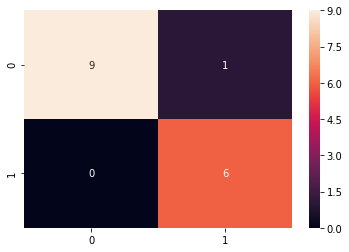

In [92]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

In [93]:
from sklearn.metrics import precision_recall_fscore_support
scr=precision_recall_fscore_support(y_test, pred, average='weighted')
print("precision of the Logistic Regression for bag of words is",scr[0])
print("recall of the Logistic Regression for bag of words is",scr[1])
print("fscore of the Logistic Regression for bag of words is",scr[2])

precision of the Logistic Regression for bag of words is 0.9464285714285714
recall of the Logistic Regression for bag of words is 0.9375
fscore of the Logistic Regression for bag of words is 0.938259109311741


# GBDT


The optimal values of depth and ensembles are 1 and 100.000000.


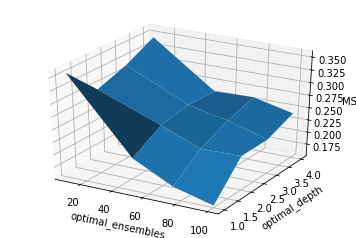

In [94]:
import xgboost as xgb
ensembles=[10,50,75,100]
depths=[1,2,3,4]
tuned_parameters=[{'n_estimators': ensembles,'max_depth':depths}]
gb_clf = xgb.XGBClassifier()
model = GridSearchCV(gb_clf, tuned_parameters, scoring = 'f1', cv=5,return_train_score=True)
model.fit(tfidf_sent_vectors, y_tr)
MSE = [1-i[1] for i in model.grid_scores_]
optimal_ensembles = model.best_params_['n_estimators']
optimal_depth=model.best_params_['max_depth']
print('\nThe optimal values of depth and ensembles are %d and %f.'  %(optimal_depth,optimal_ensembles))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = ensembles
y = depths
X, Y = np.meshgrid(x, y)
zs = np.array(MSE)
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z)
ax.set_xlabel('optimal_ensembles')
ax.set_ylabel('optimal_depth')
ax.set_zlabel('MSE')
plt.show()

In [95]:
gbdt_optimal = xgb.XGBClassifier(n_estimators=optimal_ensembles,max_depth = optimal_depth)
gbdt_optimal.fit(tfidf_sent_vectors, y_tr)
pred = gbdt_optimal.predict(tfidf_test_vectors)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of optimal Random forest classifier is %f%%' %  acc)


The accuracy of optimal Random forest classifier is 93.750000%


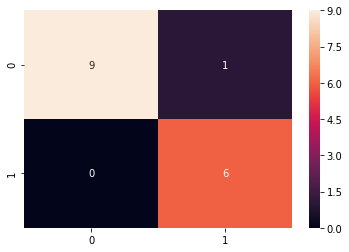

In [96]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

In [97]:
from sklearn.metrics import precision_recall_fscore_support
scr=precision_recall_fscore_support(y_test, pred, average='weighted')
print("precision of the Logistic Regression for bag of words is",scr[0])
print("recall of the Logistic Regression for bag of words is",scr[1])
print("fscore of the Logistic Regression for bag of words is",scr[2])

precision of the Logistic Regression for bag of words is 0.9464285714285714
recall of the Logistic Regression for bag of words is 0.9375
fscore of the Logistic Regression for bag of words is 0.938259109311741


# Randomsearchcv

In [98]:
from sklearn.model_selection import RandomizedSearchCV
ensembles=[10,50,75,100]
depths=[1,2,3,4]
tuned_parameters={'n_estimators': ensembles,'max_depth':depths}
random_gbdt = xgb.XGBClassifier()
model = RandomizedSearchCV(random_gbdt, tuned_parameters, scoring = 'f1',n_iter=4, cv=5,return_train_score=True)
model.fit(tfidf_sent_vectors, y_tr)
print(model.best_estimator_)
pred = model.best_estimator_.predict(tfidf_test_vectors)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of optimal SVC classifier for optimal model is %f' % (acc))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

The accuracy of optimal SVC classifier for optimal model is 93.750000


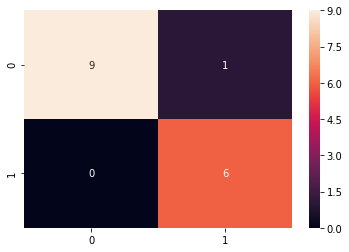

In [99]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

In [100]:
from sklearn.metrics import precision_recall_fscore_support
scr=precision_recall_fscore_support(y_test, pred, average='weighted')
print("precision of the Logistic Regression for bag of words is",scr[0])
print("recall of the Logistic Regression for bag of words is",scr[1])
print("fscore of the Logistic Regression for bag of words is",scr[2])

precision of the Logistic Regression for bag of words is 0.9464285714285714
recall of the Logistic Regression for bag of words is 0.9375
fscore of the Logistic Regression for bag of words is 0.938259109311741


# Summary table

<table style="width:100%">
  <tr>
    <th>Model</th>
    <th>Hyper parameter</th> 
    <th>Train error</th>
    <th>Test accuracy</th>
  </tr>
  <tr>
    <td>Bag of words with brute force and 40k points</td>
    <td>k=17</td> 
    <td>29.9</td>
    <td>68.1</td>
  </tr>
  <tr>
    <td>Bag of words with kd_tree and 3k points</td>
    <td>k=05</td> 
    <td>28.8</td>
    <td>75.0</td>
  </tr>
  <tr>
    <td>Unigram-bigram with brute force and 40k points</td>
    <td>k=19</td> 
    <td>37.1</td>
    <td>59.0</td>
  </tr>
  <tr>
    <td>Unigram-bigram with kd_tree and 3k points</td>
    <td>k=09</td> 
    <td>32.3</td>
    <td>71.4</td>
  </tr>
  <tr>
    <td>tfidf with brute force and 40k points</td>
    <td>k=47</td> 
    <td>19.6</td>
    <td>80.3</td>
  </tr>
  <tr>
    <td>tfidf with kd_tree and 3k points</td>
    <td>k=05</td> 
    <td>14.8</td>
    <td>83.7</td>
  </tr>
  <tr>
    <td>Avg W2V with brute force and 40k points</td>
    <td>k=39</td> 
    <td>18.2</td>
    <td>81.4</td>
  </tr>
  <tr>
    <td>Avg W2V with kd_tree and 3k points</td>
    <td>k=05</td> 
    <td>27.6</td>
    <td>69.6</td>
  </tr>
  <tr>
    <td>Tfidf W2V with brute force and 40k points</td>
    <td>k=47</td> 
    <td>29.8</td>
    <td>71.6</td>
  </tr>
  <tr>
    <td>Tfidf W2V with kd_tree force and 3k points</td>
    <td>k=07</td> 
    <td>32.1</td>
    <td>71.4</td>
  </tr>
</table>
